# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | nuuk
Processing Record 4 of Set 1 | fale old settlement
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | basco
Processing Record 7 of Set 1 | leava
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | traralgon
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | arkadelphia
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | gadzhiyevo
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | mossel bay
Processing Record 18 of Set 1 | bayganin
Processing Record 19 of Set 1 | al bayda'
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | margaret river
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,281.15,72,100,5.64,ZA,1694392978
1,enewetak,11.3474,162.3373,302.33,71,64,4.33,MH,1694392978
2,nuuk,64.1835,-51.7216,275.49,93,100,2.57,GL,1694392978
3,fale old settlement,-9.3852,-171.2468,301.36,75,51,3.87,TK,1694392978
4,hawaiian paradise park,19.5933,-154.9731,300.95,72,40,3.60,US,1694392979


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\uwagb\Downloads\Starter_Code (2)\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\uwagb\Downloads\Starter_Code (2)\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,281.15,72,100,5.64,ZA,1694392978
1,enewetak,11.3474,162.3373,302.33,71,64,4.33,MH,1694392978
2,nuuk,64.1835,-51.7216,275.49,93,100,2.57,GL,1694392978
3,fale old settlement,-9.3852,-171.2468,301.36,75,51,3.87,TK,1694392978
4,hawaiian paradise park,19.5933,-154.9731,300.95,72,40,3.60,US,1694392979


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

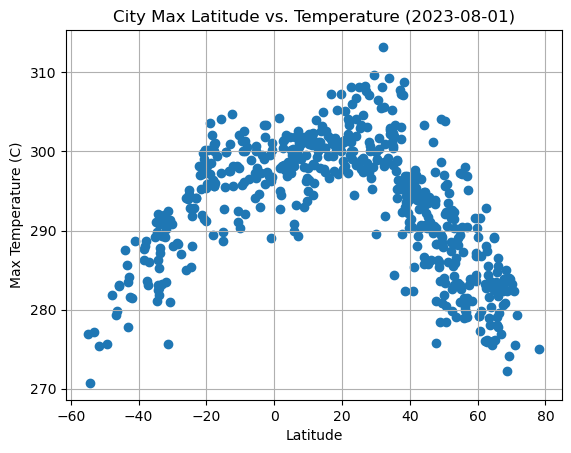

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-08-01)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig(r"C:\Users\uwagb\Downloads\Starter_Code (2)\Starter_Code\output_data")

# Show plot
plt.show()

#### Latitude Vs. Humidity

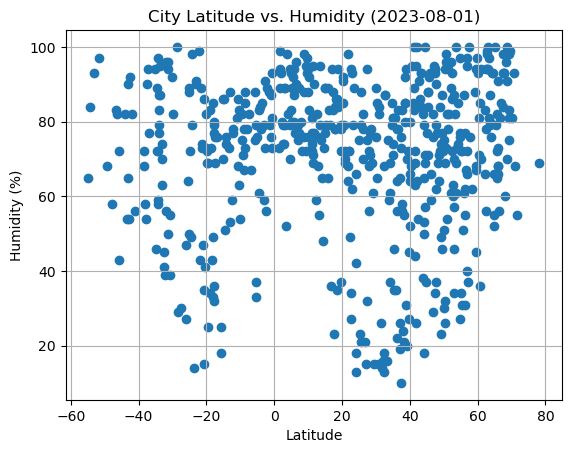

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-01)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\uwagb\Downloads\Starter_Code (2)\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

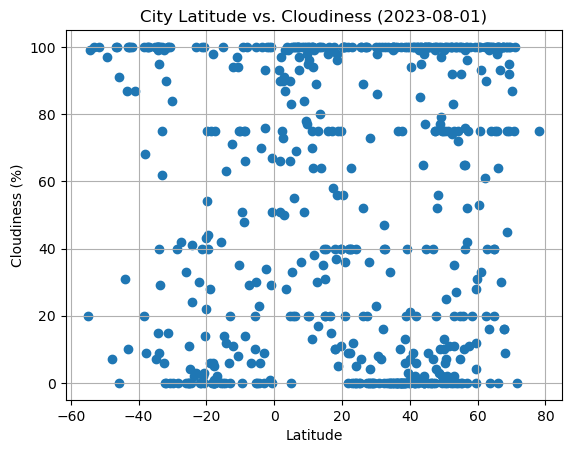

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-01)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\uwagb\Downloads\Starter_Code (2)\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

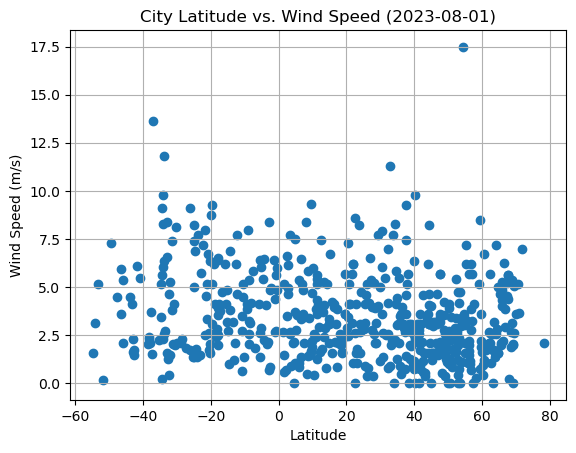

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-01)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig(r"C:\Users\uwagb\Downloads\Starter_Code (2)\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, title, x_label, y_label,line_eq_pos=(10,277)):
    # Calculate the correlation
    correlation = round(st.pearsonr(x_values,y_values)[0],2)

    # Calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Gernerate scatter chart with liner regression line, equation of line, r-squared value
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, 'r-')

    # Plot the Annotation in the graph 
    plt.annotate(line_eq,line_eq_pos,fontsize=11,color="red")

    # Define title and x/y labels
    plt.title(title, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f'The r-value is: {rvalue}')
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,enewetak,11.3474,162.3373,302.33,71,64,4.33,MH,1694392978
2,nuuk,64.1835,-51.7216,275.49,93,100,2.57,GL,1694392978
4,hawaiian paradise park,19.5933,-154.9731,300.95,72,40,3.60,US,1694392979
5,basco,20.4487,121.9702,301.15,79,100,7.30,PH,1694392979
10,constantia,44.1833,28.6500,285.76,53,0,3.58,RO,1694392980


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,281.15,72,100,5.64,ZA,1694392978
3,fale old settlement,-9.3852,-171.2468,301.36,75,51,3.87,TK,1694392978
6,leava,-14.3000,-178.1667,299.90,74,12,6.88,WF,1694392979
7,grytviken,-54.2811,-36.5092,270.73,84,99,3.11,GS,1694392979
8,traralgon,-38.1833,146.5333,288.04,58,68,2.41,AU,1694392980


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7472769642932386


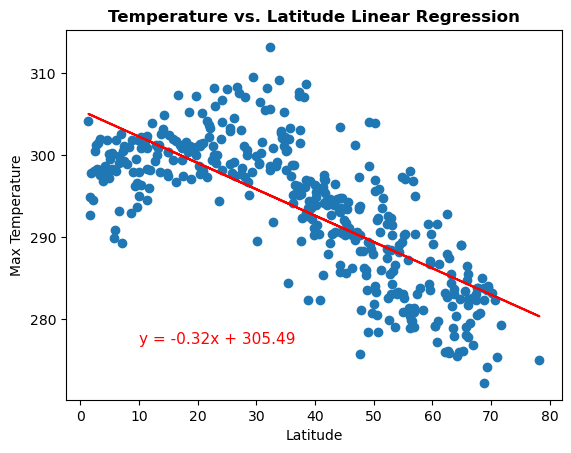

In [22]:
# Linear regression on Northern Hemisphere
title='Temperature vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Max Temperature'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], title, x_label, y_label)

The r-value is: 0.8167899883679235


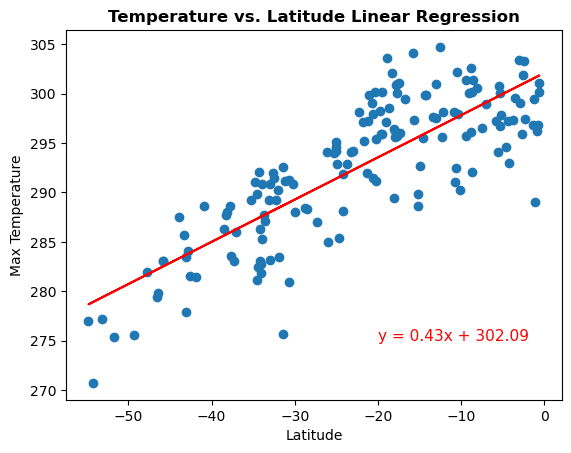

In [23]:
# Linear regression on Southern Hemisphere
title='Temperature vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Max Temperature'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], title, x_label, y_label,(-20,275))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.027113453463846065


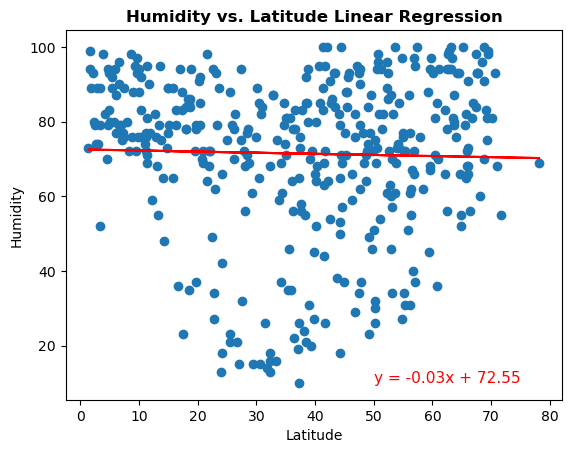

In [24]:
# Northern Hemisphere
title='Humidity vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Humidity'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], title, x_label, y_label,(50,10))

The r-value is: 0.006334712714213105


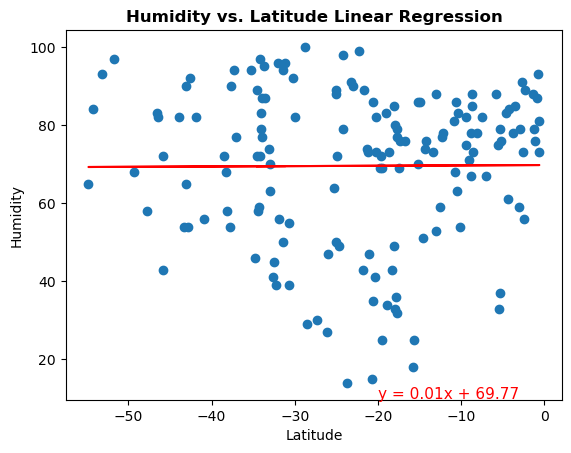

In [30]:
# Southern Hemisphere
title='Humidity vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Humidity'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], title, x_label, y_label,(-20,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.24848979619370382


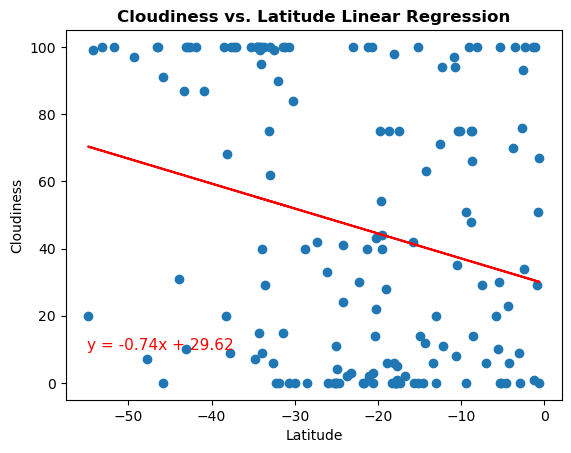

In [26]:
# Southern Hemisphere
title='Cloudiness vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Cloudiness'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], title, x_label, y_label,(-55,10))

The r-value is: -0.24848979619370382


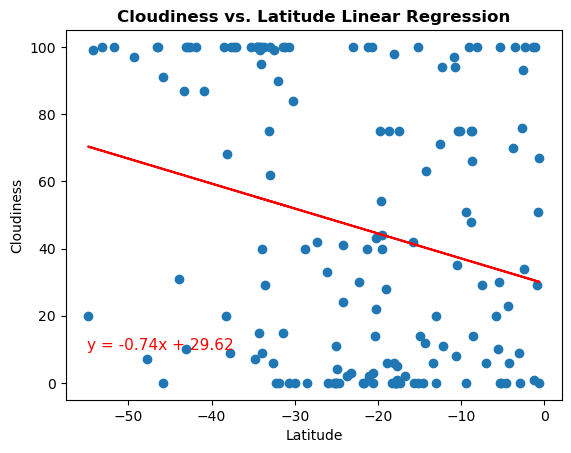

In [31]:
# Southern Hemisphere
title='Cloudiness vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Cloudiness'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], title, x_label, y_label,(-55,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07609219695318456


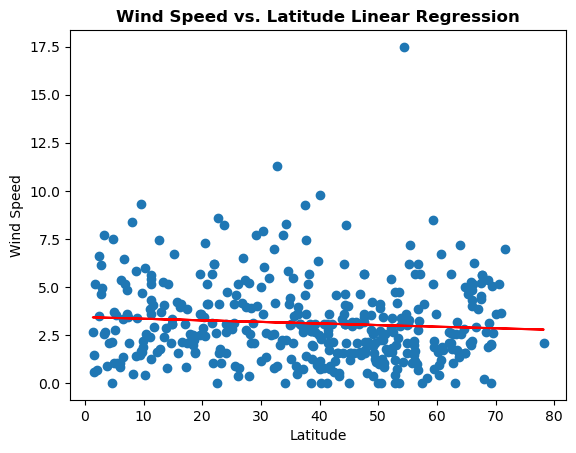

In [29]:
# Northern Hemisphere
title='Wind Speed vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Wind Speed'
linearRegression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], title, x_label, y_label,(40,22))

The r-value is: -0.004315856469197187


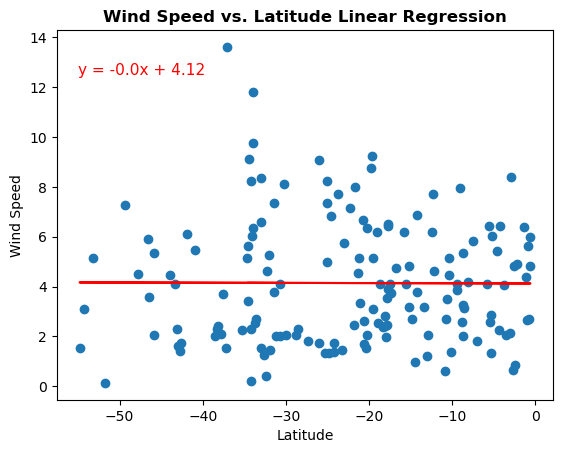

In [28]:
# Southern Hemisphere
title='Wind Speed vs. Latitude Linear Regression'
x_label='Latitude'
y_label='Wind Speed'
linearRegression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], title, x_label, y_label,(-55,12.5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no or very weak negative correlation between wind speed and latitude in the nothern and southern hemisphere .